In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
dataset = pd.read_csv("resto_preprocessed.csv", delimiter=";")

In [61]:
x = dataset[["subdistrict", "Average Price"]]
y = dataset["Category_Bakmie"]

In [62]:
print(x)

       subdistrict  Average Price
0               67          53614
1               67          18509
2               67          20893
3              142          12227
4               89          19430
...            ...            ...
25126          145          24350
25127          119          18123
25128          119          38708
25129          143          26000
25130           14          15925

[25131 rows x 2 columns]


In [63]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
25126    0
25127    0
25128    0
25129    0
25130    0
Name: Category_Bakmie, Length: 25131, dtype: int64


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [65]:
print(x_train)

       subdistrict  Average Price
24078           70          44053
3401           150          11042
10901          110          11314
16262           38           8125
15760          106          13301
...            ...            ...
13123           41          29111
19648          104          23266
9845           166          23888
10799          106         139842
2732            10          85490

[18848 rows x 2 columns]


In [66]:
print(x_test)

       subdistrict  Average Price
24408           83          18750
1821           141           9815
2634            75           7615
23324          121          18478
644            120           7869
...            ...            ...
4175            17           8182
198            137          45538
4758            90          47033
19791           57          42593
12847           20          27396

[6283 rows x 2 columns]


In [67]:
print(y_train)

24078    1
3401     0
10901    0
16262    0
15760    0
        ..
13123    0
19648    0
9845     0
10799    0
2732     0
Name: Category_Bakmie, Length: 18848, dtype: int64


In [68]:
print(y_test)

24408    0
1821     1
2634     0
23324    1
644      0
        ..
4175     0
198      0
4758     0
19791    0
12847    0
Name: Category_Bakmie, Length: 6283, dtype: int64


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [71]:
print(x_train)

[[-0.56103369  0.76333197]
 [ 1.04722832 -0.64649099]
 [ 0.24309732 -0.63487451]
 ...
 [ 1.36888073 -0.09786824]
 [ 0.16268422  4.85425719]
 [-1.7672302   2.53300979]]


In [72]:
print(x_test)

[[-0.29969111 -0.31730026]
 [ 0.86629885 -0.69889331]
 [-0.46051731 -0.79285019]
 ...
 [-0.15896818  0.89060084]
 [-0.82237626  0.70097877]
 [-1.56619744  0.05195028]]


In [73]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [74]:
y_pred = classifier.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5462    0]
 [ 821    0]]


In [76]:
correct_predictions = np.trace(cm)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples
print("Accuracy : ", accuracy)


Accuracy :  0.8693299379277415


<ipython-input-78-1d392b82dd26>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


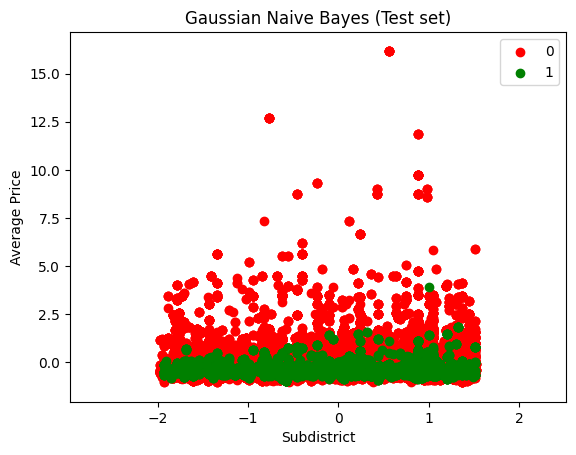

In [78]:
X_set, y_set = np.concatenate(
    (x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0)
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(("red", "green"))(i), label=j)
plt.title("Gaussian Naive Bayes (Test set)")
plt.xlabel("Subdistrict")
plt.ylabel("Average Price")
plt.legend()
plt.show()
